# Stock Price Prediction

#### Try to build a model to predict the stock price of a particular company for the next day with the help of different stock affecting features
#### Model is trained using LSTM (Long Short Term Memory) network (type of recurrent neural network)

## Quick Overview for LSTM 

- Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work. They work tremendously well on a large variety of problems, and are now widely used.
- LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!
- All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.
- LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

- The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem.

- As such, it can be used to create large recurrent networks that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.

- Instead of neurons, LSTM networks have memory blocks that are connected through layers.

- A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.

There are three types of gates within a unit:

- Forget Gate: conditionally decides what information to throw away from the block.
- Input Gate: conditionally decides which values from the input to update the memory state.
- Output Gate: conditionally decides what to output based on input and the memory of the block.

Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

Detailed information about the working of LSTM can be found on 
http://colah.github.io/posts/2015-08-Understanding-LSTMs/
https://deeplearning4j.org/lstm.html

In [1]:
import pandas as pd
from pandas import datetime
import datetime
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import pandas as pd
import pandas_datareader.data as web
from sklearn import preprocessing, linear_model
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model

Using TensorFlow backend.


## Collecting Dataset for Apple company stock price

- Dataset for Apple comapny is taken from "yahoo" from the very first date when Apple comapny was listed on the stock markets. It is loaded using pandas_datareader package. 
- Documentation for this package is available at https://pandas-datareader.readthedocs.io/en/latest/
- Dataset contains 6 features for a particular day like Open price, Close price, High (highest price at that particular day), Low (Lowest price at that particular day), Adj Close (adjusted close price) and Volume (no. of shares traded for that particular day)
- Close price is dropped from the dataframe because Close and Adj Close are almost same.
- Rows having null values are dropped from the dataframe.

In [2]:
stock = 'AAPL'
start_date = datetime.datetime(1950, 1, 1)
end_date = datetime.date.today()
df = web.DataReader(stock, "yahoo", start_date, end_date) #Collection of stock price from the very first date
df.drop(['Close'], 1, inplace=True)                       # Close price column in dropped
df = df.dropna()                                          # rows having null values are droppped
df

,Open,High,Low,Adj Close,Volume
Date,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.420087,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.398169,43971200.0
1980-12-16,0.453125,0.453125,0.450893,0.368946,26432000.0
1980-12-17,0.462054,0.464286,0.462054,0.378078,21610400.0
1980-12-18,0.475446,0.477679,0.475446,0.389037,18362400.0
1980-12-19,0.504464,0.506696,0.504464,0.412781,12157600.0
1980-12-22,0.529018,0.531250,0.529018,0.432872,9340800.0
1980-12-23,0.551339,0.553571,0.551339,0.451137,11737600.0
1980-12-24,0.580357,0.582589,0.580357,0.474881,12000800.0


## Scaling the Data

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.

Documentation for MinMaxScaler can be found at http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [6]:
#scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
df['Adj Close'] = min_max_scaler.fit_transform(df['Adj Close'].values.reshape(-1,1))
df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))

## Feature Selection

For this model, four features (Open, High, Low, Adj Close) are selected for learning purpose.

In [7]:
X1_df = df[['Open','High','Low','Adj Close']]

## Formulating train and test matrices

- In this section, first sample of X matrix is formed by taking the first 22 rows of dataframe and then second sample of X matirx is formed using rows 2-23. So, every sample in X-matrix is formed like the same. Corresponding Y-matrix (target variable) is formed by taking values from the 23rd row of Adj Close column.
- So basically, first 22 rows are taken for X matrix and its next Adj Close value (i.e. the 23rd value) is our target variable. 
- LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features]

In [8]:
no_of_features = len(X1_df.columns)
data = X1_df.as_matrix()
sequence_length = 23
result = []
# taking over-lapping 22 samples from the dataframe to make single sample in X matrix.
# Corresponding Y matrix (i.e. Adj Close price) value will be 23rd value of the dataframe.
# So, taking the first 22 samples from the dataframe as a single dataframe 
# and predicting  nthe 23rd value of Adj Close price.
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length]) 
result = np.array(result)
row = round(0.9 * result.shape[0])
train = result[:int(row), :]               # taking 90% data for training 
X_train = train[:, :-1]                    # all data for n days
y_train = train[:, -1][:,-1]               # adjusted close price for n+1 day
X_test = result[int(row):, :-1]
y_test = result[int(row):, -1][:,-1] 

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], no_of_features))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], no_of_features)) 
print "Train X matrix shape : ", X_train.shape
print "Test X matrix shape : ", X_test.shape
print "Train Y vector shape :", y_train.shape
print "Test Y vector shape : ", y_test.shape

Train X matrix shape :  (8380, 22, 4)
Test X matrix shape :  (931, 22, 4)
Train Y vector shape : (8380,)
Test Y vector shape :  (931,)


In [42]:
import keras.backend as K
K.clear_session()

## Model Building

- Parameters used for model building are given below 
- Dropout of 0.2 is used between two hidden layers. To see what is the importance of dropout and how to select it can be found at https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
- To get an insight of how to build model using LSTM networks, visit https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [43]:
# The parameters below are selected after trying many parameters
d = 0.2
window = 22
shape = [4, window, 1]            # feature, window, output
neurons = [128, 128, 32, 1]
epochs = 150
def BuildModel(layers, neurons, d):
    model = Sequential()
    
    model.add(LSTM(neurons[0], input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(neurons[1], input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(neurons[3],kernel_initializer="uniform",activation='linear'))
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

## Model Execution

- While fitting the model, X_train and y_train are split into 90% and 10% for training and validation respectively.
- While fitting the model, if you are using a CPU on a regular laptop then each epoch will take around 15-20 seconds. So the whole process will take approximately 1 hour.
- Here I have run the epochs on a Google Cloud GPU instance to make the process faster.
- Information about how to use Google Cloud GPU instance for machine learning can be found at https://towardsdatascience.com/running-jupyter-notebook-in-google-cloud-platform-in-15-min-61e16da34d52

In [44]:
model = BuildModel(shape, neurons, d)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 22, 128)           68096     
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 203,841
Trainable params: 203,841
Non-trainable params: 0
_________________________________________________________________


In [45]:
# X_train and y_train are split into 90% for training and 10% for test.
# batch size is taken as 512.
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=epochs,
    validation_split=0.1,
    verbose=1)

Train on 7542 samples, validate on 838 samples
Epoch 1/150
7542/7542 [==============================] - 5s 644us/step - loss: 0.0012 - acc: 1.3259e-04 - val_loss: 0.0039 - val_acc: 0.0000e+00
Epoch 2/150
7542/7542 [==============================] - 5s 649us/step - loss: 1.2141e-04 - acc: 1.3259e-04 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 3/150
7542/7542 [==============================] - 5s 648us/step - loss: 4.1899e-05 - acc: 1.3259e-04 - val_loss: 0.0180 - val_acc: 0.0000e+00
Epoch 4/150
7542/7542 [==============================] - 5s 646us/step - loss: 2.7980e-05 - acc: 1.3259e-04 - val_loss: 0.0096 - val_acc: 0.0000e+00
Epoch 5/150
7542/7542 [==============================] - 5s 647us/step - loss: 1.8659e-05 - acc: 1.3259e-04 - val_loss: 0.0057 - val_acc: 0.0000e+00
Epoch 6/150
7542/7542 [==============================] - 5s 647us/step - loss: 1.7985e-05 - acc: 1.3259e-04 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 7/150
7542/7542 [==============================] - 5s 646

## Model Evaluation

- In this section, train score and test score are evaluated using model.evaluate function
- Documentation for model.evaluate can be found at https://keras.io/models/model/

In [46]:
#from sklearn.metrics import mean_squared_error
import math
from math import sqrt
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

In [47]:
model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00002 MSE (0.00 RMSE)
Test Score: 0.00040 MSE (0.02 RMSE)


(1.6835879301838986e-05, 0.00040074923224787197)

## Prediction 

- In this section, stock price is predicted with the help of X_test matrix and the model 

In [48]:
def predicted_values(model, X_test):

    p = model.predict(X_test)              #predict Adj Close price based on X_test
    return p

In [49]:
p = predicted_values(model, X_test)

## Denormalizing actual and predicted values and plotting them to check the results

-  Function denormalize just gives the denormalized values of Adj Close price that we first fetched from the yahoo
- Function plot_result takes the normalized actual and predicted values of Adj Close as arguement and the denormalize it using the denormalize function and finally plot the actual and predicted values to compare the results

In [50]:
# function to denormalize predicted and actual values.
def denormalize(stock, normalized_value):
    start = datetime.datetime(2000, 1, 1)
    end = datetime.date.today()
    df = web.DataReader(stock, "yahoo", start, end)
    
    df = df['Adj Close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    min_max_scaler = preprocessing.MinMaxScaler()
    x = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

In [51]:
# function to plot the predicted & actaual values and compare them
def plot_result(stock, normalized_value_p, normalized_value_y_test):
    newp = denormalize(stock, normalized_value_p)               #gives the denormalize predicted values
    newy_test = denormalize(stock, normalized_value_y_test)     #gives the denormalize actual values
    fig = plt.figure(figsize=(8, 5), dpi=200)
    plt.plot(newp, color='red', label='Prediction')
    plt.plot(newy_test,color='blue', label='Actual')
    plt.legend(loc='best')
    plt.title('The test result for {}'.format(stock))
    plt.xlabel('Days')
    plt.ylabel('Adjusted Close')
    plt.show()

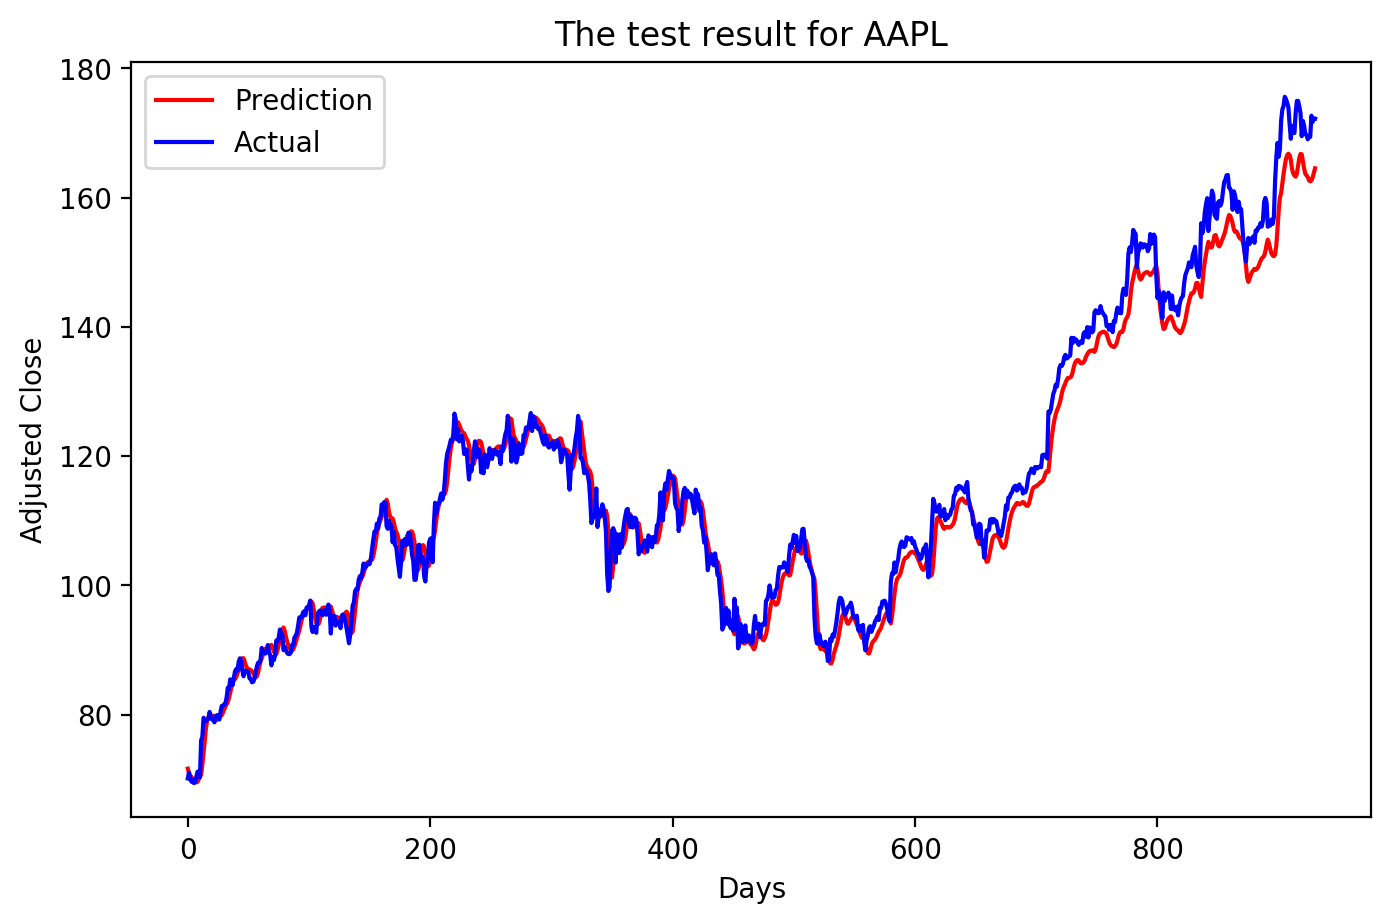

In [52]:
plot_result(stock, p, y_test)

## Conclusion

- LSTM network are very good for predicting stock prices based on the previous data of a particular stock.
- It can also be used to create an event driven model that uses sentiment analysis on news data to predict the stock price. Combining this model with the event driven model will be a pretty good model to predict stock price because many times stock prices fluctuate based on particular news affecting that particular stock or industry.
- Model Evaluation is done using the metrics mean square error.